In [1]:
import numpy as np
import matplotlib
import scipy
import sklearn
import statsmodels
import seaborn
import pydot
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.ar_model import AutoReg

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


from scipy import stats
from scipy.stats.stats import mode
from scipy.stats import uniform
from sklearn.model_selection import (train_test_split, RepeatedKFold,RandomizedSearchCV)

from sklearn.linear_model import Ridge

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


import pickle

<ipython-input-1-0f71a55aea3e>:18: DeprecationWarning: Please use `mode` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import mode


In [2]:
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join
import matplotlib.pyplot as plt

In [3]:
# execute this for the 1st time
# !pip install -r example-requirements.txt

# download file
!wget http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat # linux

# and place in folder data/
mat_contents = sio.loadmat('data3SS2009.mat')

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)
y

--2023-11-28 14:23:54--  http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat
Resolving helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)... 139.82.34.12
Connecting to helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)|139.82.34.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267634147 (255M)
Saving to: ‘data3SS2009.mat’

data3SS2009.mat     100%[===================>] 255.24M  14.0MB/s    in 16s     

2023-11-28 14:24:11 (15.9 MB/s) - ‘data3SS2009.mat’ saved [267634147/267634147]



array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [4]:
np.where(y==10)

(array([450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
        463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
        476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
        489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]),)

In [5]:
y_bin_damaged = np.zeros((1,850))
y_bin_damaged[:,450:] = y_bin_damaged[:,450:] +1
y_bin_damaged

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

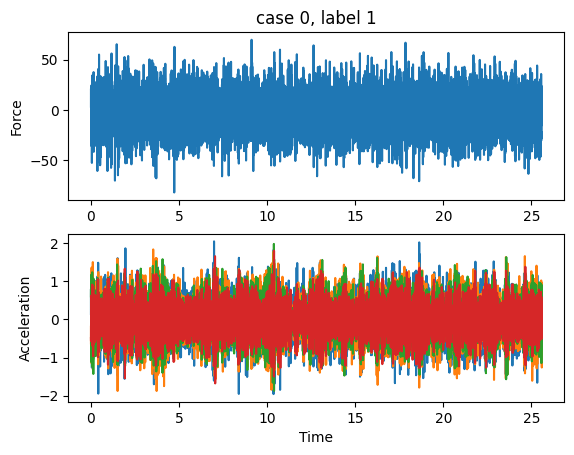

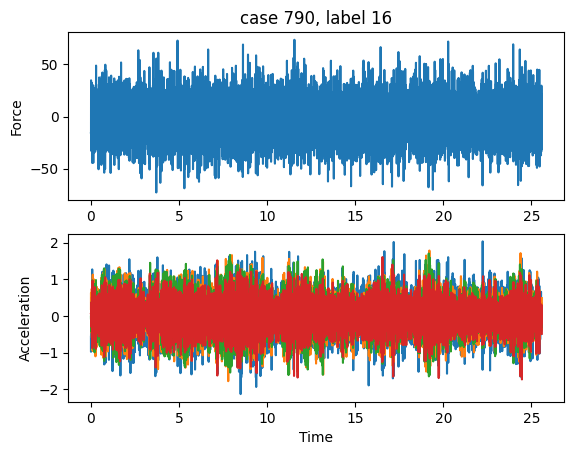

In [6]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

In [7]:
X = np.concatenate((Ch2,Ch3,Ch4,Ch5))

X

print( 'matrix X: ', X, '\n matrix X.shape: ',X.shape)

matrix X:  [[ 0.14656393  0.12344872 -0.42452564 ...  0.62527312  0.18531354
  -0.08524884]
 [ 0.79236289  0.26123975 -0.52503197 ...  0.5761841   0.75775165
  -0.38039847]
 [ 0.17113439  0.98893784  0.60084113 ... -0.10711284  0.6940215
  -0.20874206]
 ...
 [ 0.21738063  0.40702133  0.44190305 ... -0.43805704  0.31272412
   0.07283314]
 [-0.03923676  0.18921679  0.05709407 ... -0.40076345  0.02953589
   0.34142521]
 [ 0.03684378 -0.30327268 -0.64940672 ... -0.17947949 -0.69738006
   0.42497897]] 
 matrix X.shape:  (32768, 850)


In [8]:
FeatAR = []
na = 29
for i in range(0,850):
  ARmodel2 = AutoReg(Ch2[:,i],na).fit()
  ARmodel3 = AutoReg(Ch3[:,i],na).fit()
  ARmodel4 = AutoReg(Ch4[:,i],na).fit()
  ARmodel5 = AutoReg(Ch5[:,i],na).fit()
  ARparams = np.concatenate([ARmodel2.params,ARmodel3.params, ARmodel4.params,ARmodel5.params])
  FeatAR.append(ARparams)
FeatAR = np.array(FeatAR)


In [9]:
FeatAR.shape

(850, 120)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_pca = pca.fit_transform(FeatAR)

print('matrix X.shape: ',X_pca.shape,'\n X_PCA:', X_pca)

matrix X.shape:  (850, 6) 
 X_PCA: [[ 7.66136505 -1.41780663  0.80665171  0.89625556 -1.19463583 -0.13840328]
 [ 6.8869037  -1.70474591  0.96095314 -0.0090899  -1.74358116 -0.49638477]
 [ 6.94763838 -1.5554447   0.94936492  0.13319058 -0.83617666 -0.46298613]
 ...
 [-5.24160818 -1.38243332  1.19297854 -2.02374849 -0.32984218  0.81221121]
 [-5.06151016 -1.37825724  1.20604602 -0.0969439   0.34497989  0.90045879]
 [-5.24563384 -1.14354112  1.67658163  0.0533145   0.28827159  0.88529276]]


In [11]:
from sklearn.preprocessing import MinMaxScaler


X1_max_min = MinMaxScaler(feature_range=(-1,1))
XAR_norm = X1_max_min.fit_transform(FeatAR)
XAR_norm


X2_max_min = MinMaxScaler(feature_range=(-1,1))
XPCA_norm = X2_max_min.fit_transform(X_pca)
XPCA_norm

print('Normalização:','\n XAR máximo normalizado: ', XAR_norm.max(), '\n XAR minimo normalizado: ',XAR_norm.min(),'\n XPCA máximo normalizado: ', XPCA_norm.max(), '\n X2 minimo normalizado: ',XPCA_norm.min())


Normalização: 
 XAR máximo normalizado:  1.0000000000000004 
 XAR minimo normalizado:  -1.0 
 XPCA máximo normalizado:  1.0000000000000004 
 X2 minimo normalizado:  -1.0


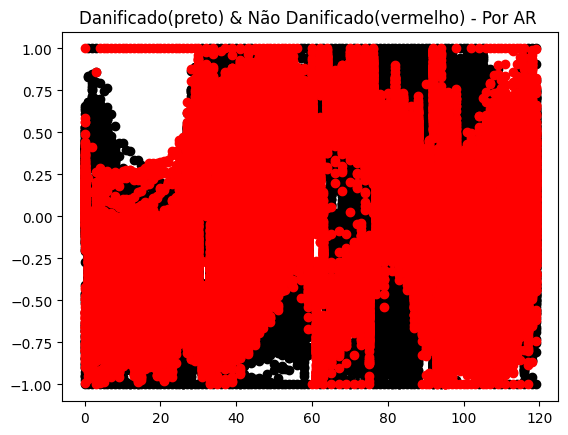

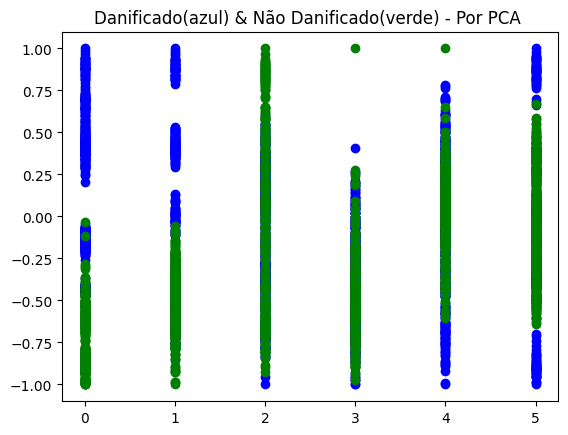

In [12]:
Y1 = np.array(range(0,120))
Y2 = np.array(range(0,6))

# Plot do AR
for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'black'
  else:
    color_name = 'red'
    plt.title('Danificado(preto) & Não Danificado(vermelho) - Por AR ')
  plt.scatter(Y1,XAR_norm[case,:], color = color_name)
plt.show()

# Plot do PCA
for case in range(0,850):
  if y_bin_damaged[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'green'
    plt.title('Danificado(azul) & Não Danificado(verde) - Por PCA ')
  plt.scatter(Y2,XPCA_norm[case,:], color = color_name)
plt.show()


In [13]:


softmaxAR = LogisticRegression(random_state=0,max_iter= 2000).fit(XAR_norm,y)



predict_AR = softmaxAR.predict(XAR_norm)
proba_AR = softmaxAR.predict_proba(XAR_norm)
score_AR = softmaxAR.score(XAR_norm,y)


print('score_AR', score_AR)

score_AR 0.9988235294117647


In [14]:
softmaxPCA = LogisticRegression(random_state=0,max_iter= 2000).fit(XPCA_norm,y)
predict_PCA = softmaxPCA.predict(XPCA_norm)
proba_PCA = softmaxPCA.predict_proba(XPCA_norm)
score_PCA = softmaxPCA.score(XPCA_norm,y)
print('score_PCA', score_PCA)

score_PCA 0.908235294117647


In [15]:


svc_linear_AR= svm.SVC(C=1.0, kernel='linear').fit(XAR_norm,y)
svc_poly_AR = svm.SVC(C=1.0, kernel='poly').fit(XAR_norm,y)
svc_rbf_AR = svm.SVC(C=1.0, kernel='rbf').fit(XAR_norm,y)
svc_sig_AR = svm.SVC(C=1.0, kernel='sigmoid').fit(XAR_norm,y)

linear_AR_predict = svc_linear_AR.predict(XAR_norm)
poly_AR_predict = svc_poly_AR.predict(XAR_norm)
rbf_AR_predict = svc_rbf_AR.predict(XAR_norm)
sig_AR_predict = svc_sig_AR.predict(XAR_norm)

svm_linear_AR = svc_linear_AR.score(XAR_norm,y)
svm_ploy_AR = svc_poly_AR.score(XAR_norm,y)
svm_rbf_AR = svc_rbf_AR.score(XAR_norm,y)
svm_sig_AR = svc_sig_AR.score(XAR_norm,y)


print('svm_linear_AR', svm_linear_AR, '\n svm_ploy_AR', svm_ploy_AR, '\n svm_rbf_AR', svm_rbf_AR, '\n svm_sig_AR', svm_sig_AR)


svm_linear_AR 1.0 
 svm_ploy_AR 0.9988235294117647 
 svm_rbf_AR 0.9976470588235294 
 svm_sig_AR 0.9847058823529412


In [16]:
svc_linear_PCA = svm.SVC(C=1.0, kernel='linear').fit(XPCA_norm,y)
svc_poly_PCA = svm.SVC(C=1.0, kernel='poly').fit(XPCA_norm,y)
svc_rbf_PCA = svm.SVC(C=1.0, kernel='rbf').fit(XPCA_norm,y)
svc_sig_PCA = svm.SVC(C=1.0, kernel='sigmoid').fit(XPCA_norm,y)

linear_PCA_predict = svc_linear_PCA.predict(XPCA_norm)
poly_PCA_predict = svc_poly_PCA.predict(XPCA_norm)
rbf_PCA_predict = svc_rbf_PCA.predict(XPCA_norm)
sig_PCA_predict = svc_sig_PCA.predict(XPCA_norm)

svm_linear_PCA = svc_linear_PCA.score(XPCA_norm,y)
svm_poly_PCA = svc_poly_PCA.score(XPCA_norm,y)
svm_rbf_PCA = svc_rbf_PCA.score(XPCA_norm,y)
svm_sig_PCA = svc_sig_PCA.score(XPCA_norm,y)

print('\n svm_linear_PCA', svm_linear_PCA, '\n svm_poly_PCA', svm_poly_PCA, '\n svm_rbf_PCA', svm_rbf_PCA, '\n svm_sig_PCA', svm_sig_PCA)


 svm_linear_PCA 0.9364705882352942 
 svm_poly_PCA 0.9341176470588235 
 svm_rbf_PCA 0.9364705882352942 
 svm_sig_PCA 0.8505882352941176


In [17]:

knn_5ar = KNeighborsClassifier(n_neighbors=5).fit(XAR_norm,y)
knn_10ar = KNeighborsClassifier(n_neighbors=10).fit(XAR_norm,y)
knn_15ar = KNeighborsClassifier(n_neighbors=15).fit(XAR_norm,y)
knn_20ar = KNeighborsClassifier(n_neighbors=20).fit(XAR_norm,y)

knn_5_ar = knn_5ar.score(XAR_norm,y)
knn_10_ar = knn_10ar.score(XAR_norm,y)
knn_15_ar = knn_15ar.score(XAR_norm,y)
knn_20_ar = knn_20ar.score(XAR_norm,y)



print(' knn_5_ar', knn_5_ar, '\n knn_10_ar', knn_10_ar, '\n knn_15_ar', knn_15_ar, '\n knn_20_ar', knn_20_ar)


 knn_5_ar 0.9941176470588236 
 knn_10_ar 0.9894117647058823 
 knn_15_ar 0.9870588235294118 
 knn_20_ar 0.9870588235294118


In [18]:
knn_5pca = KNeighborsClassifier(n_neighbors=5).fit(XPCA_norm,y)
knn_10pca = KNeighborsClassifier(n_neighbors=10).fit(XPCA_norm,y)
knn_15pca = KNeighborsClassifier(n_neighbors=15).fit(XPCA_norm,y)
knn_20pca= KNeighborsClassifier(n_neighbors=20).fit(XPCA_norm,y)

knn_5_pca = knn_5pca.score(XPCA_norm,y)
knn_10_pca = knn_10pca.score(XPCA_norm,y)
knn_15_pca = knn_15pca.score(XPCA_norm,y)
knn_20_pca = knn_20pca.score(XPCA_norm,y)

print('\n knn_5_pca', knn_5_pca, '\n knn_10_pca', knn_10_pca, '\n knn_15_pca', knn_15_pca, '\n knn_20_pca', knn_20_pca)


 knn_5_pca 0.9376470588235294 
 knn_10_pca 0.9376470588235294 
 knn_15_pca 0.9294117647058824 
 knn_20_pca 0.9235294117647059


In [19]:
param_grid = []

param_grid.append(
    [
     {
      "LGR__C": stats.loguniform(1e-2,1e2),
     }
    ]
)


param_grid.append(
    [
     {
      "SVC__C": stats.loguniform(1e-2,1e2),
      "SVC__kernel": ["linear","poly","rbf","sigmoid"],
     }
    ]
)



param_grid.append(
    [
     {
      "KNN__n_neighbors": stats.randint(2,100),
      "KNN__weights": ["uniform","distance"],
     }
    ]
)

param_grid.append(
    [
        {
            "DTR__criterion": [ "friedman_mse"],
            "DTR__splitter": ["best","random"],
            "DTR__max_features": stats.uniform(),
        }
    ]

)


param_grid.append(
    [
        {
            "RFR__n_estimators": stats.randint(2,100),
            "RFR__criterion": ["absolute_error"],
            "RFR__max_depth": stats.randint(2,20),
            "RFR__max_features": stats.uniform(),
        }
    ]

)



models = []

models.append(("LGR", LogisticRegression(max_iter=1000)))
models.append(("SVC",SVC()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("DTR", DecisionTreeRegressor()))
models.append(("RFR", RandomForestRegressor()))

In [20]:
n_splits=5
n_reps=20
n_iters=20
models_list=['LGR','SVC','KNN','DTR','RFR']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:




random_search_AR={}
param_grids_AR={}
yh_test_AR={}
acc1={}
for k in range(0,5):
  X_train_AR, X_test_AR, y_train_AR, y_test_AR = train_test_split(XAR_norm,y,
                                                                  test_size=0.6,
                                                                  random_state=42)
  rkf = RepeatedKFold(n_splits=n_splits,n_repeats=n_reps,random_state=42)
  clf = Pipeline([("scaler",StandardScaler()), (models[k])])
  param_grids_AR[models_list[k]] = param_grid[k]
  random_search_AR[models_list[k]] = RandomizedSearchCV(clf,verbose=1,
                                                        scoring="neg_mean_squared_error",
                                                        param_distributions=param_grids_AR[models_list[k]],
                                                        n_iter=n_iters,
                                                        n_jobs=-1,
                                                        cv=rkf,
                                                        random_state=42)
  random_search_AR[models_list[k]].fit(X_train_AR,y_train_AR)

  yh_test_AR[models_list[k]] = random_search_AR[models_list[k]].predict(X_test_AR)
  acc1[models_list[k]] = random_search_AR[models_list[k]].score(X_test_AR, y_test_AR)
  print('Accuracy Score: ',models_list[k], ' AR: ', acc1[models_list[k]])





Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  LGR  AR:  -0.0
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  SVC  AR:  -0.0
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  KNN  AR:  -0.14368662085453474
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  DTR  AR:  -0.7549019607843137
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  RFR  AR:  -0.2769479136154236


In [23]:
random_search_PCA={}
param_grids_PCA={}
yh_test_PCA={}
acc2={}
for k in range(0,5):

  X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(XPCA_norm,y,
                                                                      test_size=0.6,
                                                                      random_state=42)
  rkf = RepeatedKFold(n_splits=n_splits,n_repeats=n_reps,random_state=42)
  clf = Pipeline([("scaler",StandardScaler()), (models[k])])
  param_grids_PCA[models_list[k]] = param_grid[k]
  random_search_PCA[models_list[k]] = RandomizedSearchCV(clf,verbose=1,
                                                         scoring="neg_mean_squared_error",
                                                         param_distributions=param_grids_PCA[models_list[k]],
                                                         n_iter=n_iters,
                                                         n_jobs=-1,
                                                         cv=rkf,
                                                         random_state=42)
  random_search_PCA[models_list[k]].fit(X_train_PCA,y_train_PCA)
  yh_test_PCA[models_list[k]] = random_search_PCA[models_list[k]].predict(X_test_PCA)
  acc2[models_list[k]] = random_search_PCA[models_list[k]].score(X_test_PCA, y_test_PCA)
  print('Accuracy Score: ',models_list[k], ' PCA: ', acc1[models_list[k]])

Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  LGR  PCA:  -0.0
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  SVC  PCA:  -0.0
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  KNN  PCA:  -0.14368662085453474
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  DTR  PCA:  -0.7549019607843137
Fitting 100 folds for each of 20 candidates, totalling 2000 fits
Accuracy Score:  RFR  PCA:  -0.2769479136154236


In [24]:
results_dict = {
    'Results_AR':random_search_AR,
    'yh_AR':yh_test_AR,
    'Results_PCA':random_search_PCA,
    'yh_PCA':yh_test_PCA,
}

In [26]:
a_file = open("TakeHome5_results_n_reps"+str(n_reps)+".pkl", "wb")
pickle.dump(results_dict, a_file)
a_file.close()

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

def perform_kmeans(X_train, X_test, n_clusters=8):
    # Fit KMeans model on training data
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=0).fit(X_train)

    # Predict clusters on test data
    kmeans_pred = kmeans_model.predict(X_test)

    return kmeans_pred

def visualize_3d_scatter(df, feature_columns, label_column):
    fig = px.scatter_3d(df, x=feature_columns[0], y=feature_columns[1], z=feature_columns[2], color=label_column)
    fig.show()

# Assuming you have already defined and loaded X_train_AR and X_test_AR
feature_columns = ['feature_0', 'feature_1', 'feature_2']

# Perform KMeans and get predictions
kmeans_AR_pred = perform_kmeans(X_train_AR, X_test_AR)

# Create a DataFrame with test data and predicted labels

df_AR = pd.DataFrame(X_test_AR[:, :3], columns=feature_columns)
df_AR['yh'] = kmeans_AR_pred


# Visualize 3D scatter plot
visualize_3d_scatter(df_AR, feature_columns, 'yh')

# Print the predicted labels
print('kmeans_AR_pred\n', kmeans_AR_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


kmeans_AR_pred
 [5 4 0 3 0 0 1 6 1 1 1 4 1 5 2 5 6 0 4 5 6 4 2 2 4 5 2 5 6 3 1 6 5 5 2 5 1
 1 7 0 5 0 0 2 1 6 3 5 1 1 0 6 1 5 7 3 5 4 4 3 0 4 1 5 5 6 4 5 6 2 0 1 0 3
 5 4 0 1 1 6 5 6 0 1 0 5 0 5 5 3 4 3 3 1 0 0 1 6 4 0 3 1 5 0 0 1 3 5 0 3 6
 6 4 3 6 6 7 4 4 6 5 5 0 0 5 1 6 2 3 2 0 1 5 6 5 1 0 0 3 7 4 0 6 5 0 5 5 4
 6 0 7 4 5 5 5 5 1 4 3 5 3 5 3 5 0 6 7 6 0 4 6 4 6 0 2 1 2 2 3 1 1 5 6 5 3
 5 1 1 4 0 0 4 5 6 4 1 6 4 0 4 2 5 0 3 5 5 6 1 2 3 5 4 6 4 0 7 3 5 4 3 5 5
 5 4 6 3 1 0 1 7 1 5 1 7 0 1 0 0 6 0 4 4 6 1 2 0 0 7 7 0 1 7 1 5 1 0 1 4 0
 7 0 5 5 0 3 1 5 0 2 2 6 4 0 5 1 1 0 5 0 4 0 1 5 1 0 6 1 4 0 4 1 5 6 4 3 4
 4 0 5 1 0 0 5 6 6 3 1 7 4 5 2 1 5 4 4 1 5 7 3 1 7 2 5 1 0 0 1 4 0 0 6 0 1
 0 3 1 1 5 5 0 0 1 0 0 6 7 1 5 3 3 7 3 5 7 3 3 3 6 3 6 5 0 0 4 6 4 4 4 2 1
 4 4 6 3 0 2 0 4 2 5 1 3 5 6 1 2 2 0 1 1 5 6 7 3 5 7 0 5 5 6 0 3 7 6 5 5 2
 0 1 0 0 3 6 2 0 5 4 1 4 5 0 6 3 0 2 3 1 1 6 6 3 0 5 5 1 5 4 6 3 6 4 6 1 0
 6 4 1 6 7 5 1 0 0 3 1 0 4 3 1 5 3 7 6 5 0 5 0 0 3 1 7 5 0 6 4 5 5 6 4 1 0
 1 4 5 0 

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

def perform_kmeans(X_train, X_test, n_clusters=8):
    # Fit KMeans model on training data
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=0).fit(X_train)

    # Predict clusters on test data
    kmeans_pred = kmeans_model.predict(X_test)

    return kmeans_pred

def visualize_3d_scatter(df, feature_columns, label_column):
    fig = px.scatter_3d(df, x=feature_columns[0], y=feature_columns[1], z=feature_columns[2], color=label_column)
    fig.show()

# Assuming you have already defined and loaded X_train_PCA and X_test_PCA
feature_columns_pca = ['feature_0', 'feature_1', 'feature_2']

# Perform KMeans and get predictions
kmeans_PCA_pred = perform_kmeans(X_train_PCA, X_test_PCA, n_clusters=6)

# Create a DataFrame with test data and predicted labels
df_PCA = pd.DataFrame(X_test_PCA, columns=[f'feature_{i}' for i in range(X_test_PCA.shape[1])])
df_PCA['yh'] = kmeans_PCA_pred


# Visualize 3D scatter plot
visualize_3d_scatter(df_PCA, feature_columns_pca, 'yh')

# Print the predicted labels
print('kmeans_PCA_pred\n', kmeans_PCA_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



kmeans_PCA_pred
 [3 0 4 3 2 4 1 2 1 1 1 0 1 3 5 3 2 4 0 3 1 0 5 5 0 3 5 3 1 3 1 1 3 3 5 3 1
 1 4 2 3 4 4 5 1 1 3 3 1 1 2 2 1 3 4 3 1 0 0 3 4 0 1 3 3 1 0 3 2 5 4 1 4 3
 3 0 4 1 1 2 3 2 4 1 4 3 2 3 3 3 0 3 3 1 2 2 1 1 0 4 3 1 3 4 4 1 3 3 4 3 1
 2 0 3 2 2 4 0 0 2 3 3 2 4 3 1 2 5 3 5 4 1 3 1 3 1 4 2 3 4 0 4 2 3 2 3 3 0
 1 4 4 0 3 3 3 1 1 0 3 3 3 3 3 3 2 2 4 1 4 0 1 0 2 2 5 1 5 5 3 1 1 3 1 3 3
 3 1 1 0 4 4 0 3 1 0 1 1 0 4 0 5 3 4 3 3 3 1 1 5 3 3 0 1 0 4 4 3 3 0 3 3 3
 3 0 2 3 1 4 1 4 1 3 1 4 4 1 4 2 2 4 0 0 1 1 5 4 4 4 4 2 1 4 1 3 1 4 1 0 4
 4 2 3 3 4 3 1 3 4 5 5 1 0 4 3 1 1 2 3 4 0 4 1 3 1 4 1 1 0 4 0 1 3 2 0 3 0
 0 2 3 1 4 4 3 2 1 3 1 4 0 3 5 1 3 0 0 1 3 4 3 1 4 5 3 1 4 4 1 0 4 4 1 4 1
 4 3 1 1 3 3 4 2 1 2 2 1 4 1 1 3 3 4 3 3 4 3 3 3 2 3 1 3 2 2 0 2 0 0 0 5 1
 0 0 1 3 2 5 2 0 5 3 1 3 3 1 1 5 5 4 1 1 3 2 4 3 3 4 4 3 3 2 4 3 4 2 3 3 5
 4 1 4 4 3 2 5 2 3 0 1 0 3 4 2 3 4 5 3 1 1 2 1 3 4 3 3 1 3 0 2 3 1 0 1 1 2
 1 0 1 2 4 3 1 4 4 3 1 4 0 3 1 3 3 4 1 3 4 3 4 4 3 1 4 3 4 1 0 3 3 1 0 1 4
 1 0 3 4